In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covertype_results = pd.read_csv('./output/covertype/results/knn_kdtree_comparison_partial.csv')
covertype_pca_results = pd.read_csv('./output/covertype/results/pca_knn_comparison_partial.csv')

In [4]:
covertype_results.describe()

,n_rows,n_features,n_neighbors,knn_accuracy,knn_precision,knn_recall,knn_f1_score,knn_fit_time,knn_predict_time,knn_total_time,kdtree_accuracy,kdtree_precision,kdtree_recall,kdtree_f1_score,kdtree_fit_time,kdtree_predict_time,kdtree_total_time,accuracy_difference,time_difference
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40957.746479,25.774648,8.225352,0.722941,0.712791,0.722941,0.713977,0.005921,1.531639,1.537560,0.722859,0.712734,0.722859,0.713904,0.156499,12.140633,12.297132,-0.000082,-10.759572
std,98038.411436,16.499471,3.956132,0.078806,0.085866,0.078806,0.083830,0.009950,6.818882,6.827914,0.078790,0.085834,0.078790,0.083793,0.425013,69.452419,69.850235,0.003064,63.045294
min,1000.000000,5.000000,3.000000,0.610000,0.580412,0.610000,0.590881,0.000995,0.017511,0.018521,0.610000,0.580412,0.610000,0.590881,0.001998,0.032649,0.035276,-0.011000,-608.013041
25%,2000.000000,10.000000,5.000000,0.655000,0.634507,0.655000,0.639028,0.002000,0.067378,0.069129,0.650863,0.633209,0.650863,0.637628,0.006495,0.077308,0.082730,0.000000,-1.336071
50%,5000.000000,20.000000,7.000000,0.716000,0.706120,0.716000,0.706687,0.002520,0.163148,0.164910,0.716000,0.706120,0.716000,0.706687,0.029974,0.136053,0.177678,0.000000,-0.070639
75%,25000.000000,40.000000,11.000000,0.780450,0.776863,0.780450,0.775144,0.006001,0.475730,0.479609,0.780450,0.776863,0.780450,0.775144,0.118327,1.637068,1.753670,0.000000,-0.017615
max,1000000.000000,54.000000,15.000000,0.925234,0.924999,0.925234,0.925034,0.079870,65.442042,65.521912,0.925234,0.924999,0.925234,0.925034,3.504773,670.030179,673.534952,0.025000,0.948137


In [5]:
covertype_pca_results.describe()

,n_rows,n_features,pca_components,n_neighbors,explained_variance,orig_knn_accuracy,orig_knn_precision,orig_knn_recall,orig_knn_f1_score,orig_knn_fit_time,...,pca_kdtree_precision,pca_kdtree_recall,pca_kdtree_f1_score,pca_kdtree_fit_time,pca_kdtree_predict_time,pca_kdtree_total_time,pca_knn_accuracy_diff,pca_kdtree_accuracy_diff,pca_knn_time_improvement,pca_kdtree_time_improvement
count,116.000000,116.000000,116.000000,116.0,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,97198.275862,32.767241,10.793103,5.0,0.546194,0.762197,0.755867,0.762197,0.756059,0.018498,...,0.714813,0.720776,0.713312,0.236755,1.965628,2.202383,-0.041297,-0.041672,0.286963,0.471336
std,166037.304338,14.673465,7.588913,0.0,0.234120,0.095416,0.100880,0.095416,0.100189,0.030334,...,0.094773,0.091849,0.096410,0.589663,3.454187,3.985641,0.055127,0.054766,0.331046,0.402615
min,1000.000000,5.000000,3.000000,5.0,0.167932,0.625000,0.609175,0.625000,0.609170,0.001012,...,0.509330,0.520000,0.508118,0.001505,0.048189,0.051701,-0.279550,-0.279550,-0.524846,-0.576482
25%,5000.000000,20.000000,4.500000,5.0,0.319220,0.691000,0.682021,0.691000,0.684044,0.003005,...,0.630859,0.645000,0.629591,0.004002,0.155787,0.160522,-0.042500,-0.042500,0.032590,0.084035
50%,25000.000000,30.000000,10.000000,5.0,0.509097,0.732000,0.726302,0.732000,0.725763,0.005012,...,0.704952,0.710500,0.703376,0.017977,0.522167,0.554597,-0.027875,-0.027875,0.242272,0.492954
75%,100000.000000,40.000000,15.000000,5.0,0.718524,0.865000,0.863871,0.865000,0.863836,0.017684,...,0.778153,0.780900,0.777116,0.170241,1.778523,1.944966,-0.010000,-0.012197,0.606990,0.910964
max,500000.000000,54.000000,25.000000,5.0,0.974111,0.925060,0.924855,0.925060,0.924866,0.127913,...,0.909730,0.910050,0.909775,4.539159,17.837793,22.376952,0.035000,0.015000,0.870856,0.988392


### N Neighbors with best accuracy

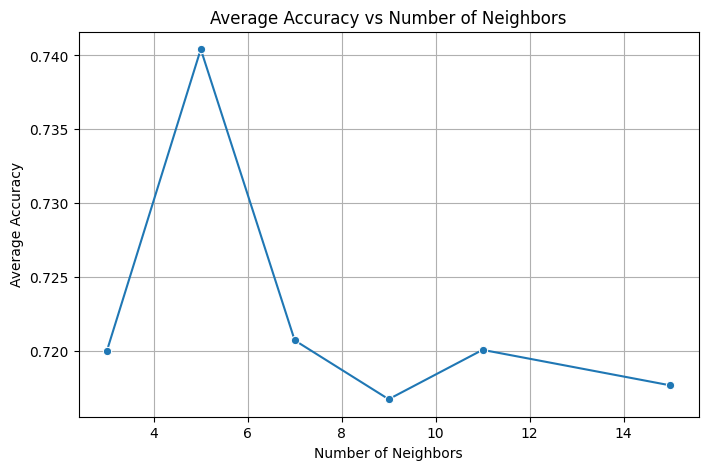

In [6]:
avg_accuracy = covertype_results.groupby('n_neighbors')['knn_accuracy'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_accuracy.index, y=avg_accuracy.values, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs Number of Neighbors')
plt.grid(True)
plt.show()

### N features with best accuracy

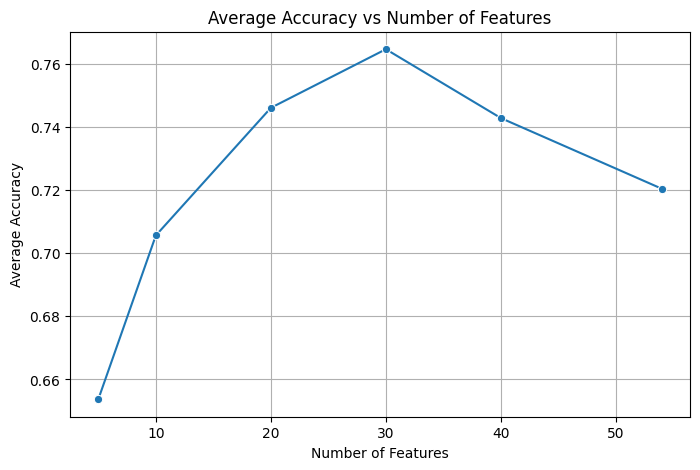

In [7]:
avg_accuracy = covertype_results.groupby('n_features')['knn_accuracy'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_accuracy.index, y=avg_accuracy.values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs Number of Features')
plt.grid(True)
plt.show()

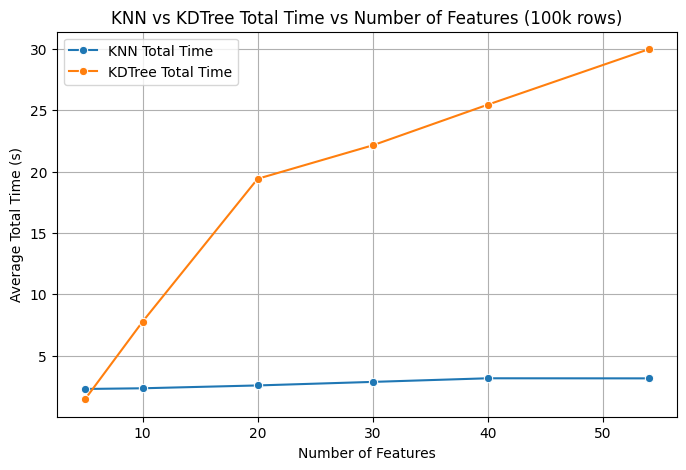

In [8]:
plt.figure(figsize=(8, 5))
subset = covertype_results[(covertype_results['n_rows'] == 100000) & (covertype_results['n_neighbors'] == 5)]

avg_knn_time = subset.groupby('n_features')['knn_total_time'].mean()
avg_kdtree_time = subset.groupby('n_features')['kdtree_total_time'].mean()

sns.lineplot(x=avg_knn_time.index, y=avg_knn_time.values, marker='o', label='KNN Total Time')
sns.lineplot(x=avg_kdtree_time.index, y=avg_kdtree_time.values, marker='o', label='KDTree Total Time')

plt.xlabel('Number of Features')
plt.ylabel('Average Total Time (s)')
plt.title('KNN vs KDTree Total Time vs Number of Features (100k rows)')
plt.legend()
plt.grid(True)
plt.show()

### N Components with best accuracy

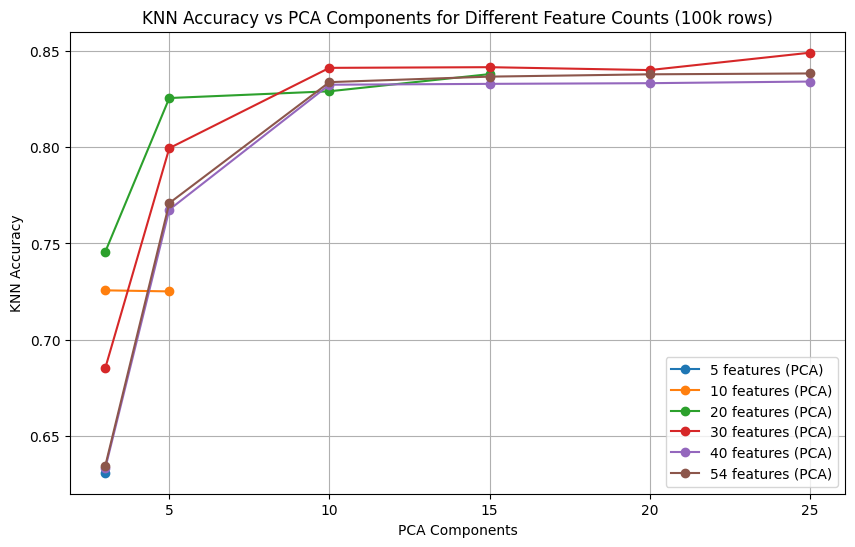

In [9]:
covertype_pca_100k = covertype_pca_results[covertype_pca_results['n_rows'] == 100000].copy()
unique_features = covertype_pca_100k['n_features'].unique()
plt.figure(figsize=(10, 6))

for n_feat in sorted(unique_features):
    subset = covertype_pca_100k[covertype_pca_100k['n_features'] == n_feat]
    plt.plot(subset['pca_components'], subset['pca_knn_accuracy'], marker='o', label=f'{n_feat} features (PCA)')

plt.xlabel('PCA Components')
plt.ylabel('KNN Accuracy')
plt.title('KNN Accuracy vs PCA Components for Different Feature Counts (100k rows)')
plt.legend()
plt.grid(True)
plt.show()

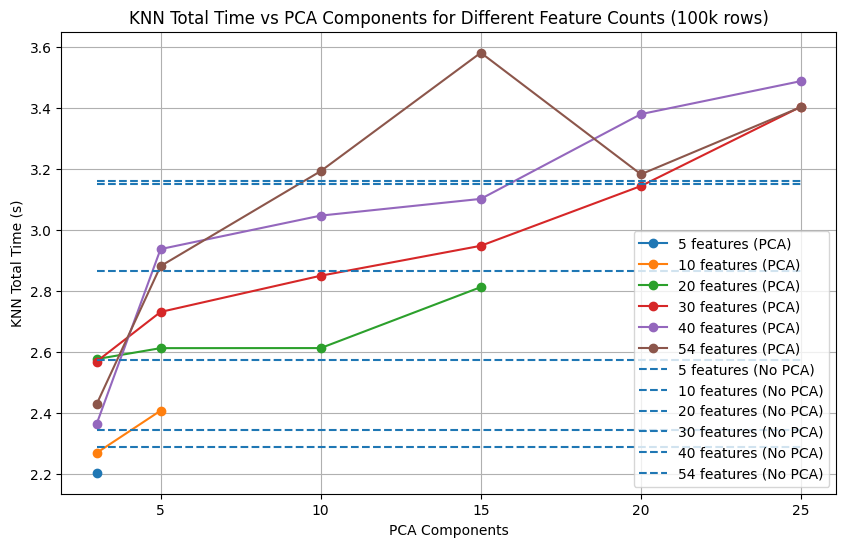

In [10]:
plt.figure(figsize=(10, 6))

for n_feat in sorted(unique_features):
    subset = covertype_pca_100k[covertype_pca_100k['n_features'] == n_feat]
    plt.plot(subset['pca_components'], subset['pca_knn_total_time'], marker='o', label=f'{n_feat} features (PCA)')

# Add total_time without PCA for each n_features
for n_feat in sorted(unique_features):
    orig_time = covertype_results[(covertype_results['n_rows'] == 100000) & (covertype_results['n_features'] == n_feat) & (covertype_results['n_neighbors'] == 5)]['knn_total_time']
    plt.hlines(orig_time, xmin=covertype_pca_100k['pca_components'].min(), xmax=covertype_pca_100k['pca_components'].max(),
               linestyles='dashed', label=f'{n_feat} features (No PCA)')

plt.xlabel('PCA Components')
plt.ylabel('KNN Total Time (s)')
plt.title('KNN Total Time vs PCA Components for Different Feature Counts (100k rows)')
plt.legend()
plt.grid(True)
plt.show()
